# Librerias utilizadas

In [1]:
%pip install wget

Note: you may need to restart the kernel to use updated packages.


In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import wget
import scipy.io.wavfile as wave
import IPython
from scipy.linalg import toeplitz, inv

# 1. Reproducir diferentes excitaciones u<sub>k</sub>(n) con un parlante y medir su respuesta y<sub>k</sub>(n) con un micrófono, con N = 48000 y fs = 48 kHz.

## a. Señal de música

In [3]:
song_url = 'https://github.com/ManuMollon261297/PASA/blob/master/TP2/Grabaciones/Entradas/buttercup_1seg.wav?raw=true'
song_file = wget.download(song_url)

In [4]:
fs, song_array = wave.read(str(song_file))
print("fs = "+str(fs))
print("Number of samples = "+ str(len(song_array)))
IPython.display.Audio(song_array,rate=fs)

fs = 48000
Number of samples = 48000


Respuesta medida:

In [5]:
song_out_url = 'https://raw.githubusercontent.com/ManuMollon261297/PASA/master/TP2/Grabaciones/Salidas/Buttercup.wav'
song_out_file = wget.download(song_out_url)
fs, song_out_array = wave.read(str(song_out_file))
IPython.display.Audio(song_out_array,rate=fs)

## b. Una señal de voz

In [6]:
voice_url = 'https://raw.githubusercontent.com/ManuMollon261297/PASA/master/TP2/Grabaciones/Entradas/Okay_1seg.wav'
voice_file = wget.download(voice_url)

In [7]:
fs, voice_array = wave.read(voice_file)
print("fs = "+str(fs))
print("Number of samples = "+ str(len(voice_array)))
IPython.display.Audio(voice_array,rate=fs)

fs = 48000
Number of samples = 48000


Respuesta medida:

In [8]:
voice_out_url = 'https://raw.githubusercontent.com/ManuMollon261297/PASA/master/TP2/Grabaciones/Salidas/okay.wav'
voice_out_file = wget.download(voice_out_url)
fs, voice_out_array = wave.read(str(voice_out_file))
IPython.display.Audio(voice_out_array,rate=fs)

## c. Una señal cuadrada de f<sub>0</sub>=100 Hz

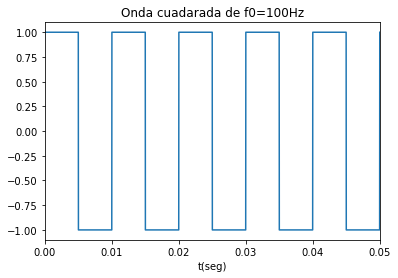

In [9]:
t= np.linspace(start=0,stop=1,num=48000)
f = 100         #Frecuencia fundamental de la onda cuadrada
square_wave = sig.square(2 * np.pi * f * t)
plt.plot(t, square_wave)
plt.title("Onda cuadarada de f0=100Hz")
plt.xlim(left=0,right=0.05)
plt.xlabel("t(seg)")
plt.show()

In [10]:
IPython.display.Audio(square_wave,rate=fs)

Respuesta medida:

In [11]:
square_out_url = 'https://raw.githubusercontent.com/ManuMollon261297/PASA/master/TP2/Grabaciones/Salidas/square.wav'
square_out_file = wget.download(square_out_url)
fs, square_out_array = wave.read(str(square_out_file))
IPython.display.Audio(square_out_array,rate=fs)

## d. Un barrido lineal de frecuencia con f<sub>0</sub> = 20 Hz, f<sub>1</sub> = 20 kHz y T = 1 s

In [12]:
t= np.linspace(start=0,stop=1,num=48000)
f1=20e3
f0=20
T=1
K= (f1-f0)/T
x = 2 * np.pi * t * ( f0 + 0.5 * K * t)
lineal_sweep = np.sin(x)

In [13]:
IPython.display.Audio(lineal_sweep,rate=fs)

Respuesta medida:

In [14]:
lineal_out_url = 'https://raw.githubusercontent.com/ManuMollon261297/PASA/master/TP2/Grabaciones/Salidas/lineal.wav'
lineal_out_file = wget.download(lineal_out_url)
fs, lineal_out_array = wave.read(str(lineal_out_file))
IPython.display.Audio(lineal_out_array,rate=fs)

## e. Un barrido exponencial de frecuencia con f<sub>0</sub> = 20 Hz, f<sub>1</sub> = 20 kHz y T = 1 s

In [15]:
t= np.linspace(start=0,stop=1,num=48000)
f1=20e3
f0=20
T=1.
K= (f1/f0)**(1./T)
x = 2 * np.pi * f0 * ( ( (K**t)-1 )/math.log(K) )
exp_sweep = np.sin(x)

In [16]:
IPython.display.Audio(exp_sweep,rate=fs)

Respuesta medida:

In [17]:
exp_out_url = 'https://raw.githubusercontent.com/ManuMollon261297/PASA/master/TP2/Grabaciones/Salidas/exp.wav'
exp_out_file = wget.download(exp_out_url)
fs, exp_out_array = wave.read(str(exp_out_file))
IPython.display.Audio(exp_out_array,rate=fs)

## f. Ruido blanco guassiano de media cero

In [18]:
noise = np.random.randn(48000)
IPython.display.Audio(noise,rate=fs)

Respuesta medida:

In [19]:
noise_out_url = 'https://raw.githubusercontent.com/ManuMollon261297/PASA/master/TP2/Grabaciones/Salidas/noise.wav'
noise_out_file = wget.download(noise_out_url)
fs, noise_out_array = wave.read(str(noise_out_file))
IPython.display.Audio(noise_out_array,rate=fs)

# 2. Estimar el filtro óptimo en cada uno de los casos. Graficar J<sub>min</sub> en función de M, y determinar el valor óptimo de M para cuando no se observe mejora de J<sub>min</sub> con aumento de M. Para ese valor de M, determinar ε y los autovalores de la matriz de autocorrelación. Ordenar los autovalores de mayor a menor, y graficar su distribución.

In [20]:
def r_matrix(vect):
    corr = np.correlate(vect,np.conj(vect), mode='same')
    r = toeplitz(corr,np.hstack((corr[0], np.conj(corr[1:]))))
    return r

def get_eigenvalues(mat):
    ev = np.linalg.eig(mat)
    return ev

def wiener_coefs(u_n, d_n):
    r_inv = inv(r_matrix(u_n)) #
    p = np.correlate(u_n, np.conj(d_n), mode='same') #
    w_o = np.matmul(r_inv, p)
#     var_d = np.var(d_n)
#     var_d_hat = np.matmul(np.matmul(p, r_inv), p.reshape((-1, 1)))
#     Jmin = var_d - var_d_hat
#     epsilon = 1 - var_d_hat/(var_d+1e-9)
    return w_o #, Jmin, epsilon

def order_m_wiener(data, desired, M):
    samples = len(data)
    new_data = np.concatenate((np.zeros(M-1),data))
    desired = np.concatenate((np.zeros(M-1),desired))
    w_o_s = list()
    print('Starting order ', M)
    #for i in range(M):
    for i in [M]:
        #print(i*100/samples, end='\r')
        #aux_w_o, aux_Jmin, aux_eps = wiener_coefs(data[i:i+M], desired[i:i+M])
        aux_w_o = wiener_coefs(new_data[i:i+M], desired[i:i+M])
        w_o_s.append(aux_w_o)
    print('\n')
    return w_o_s

def search_opt_M(data, desired, M_array):
    plt.plot(data)
    plt.plot(desired)
    plt.show()
    Jmin_s = []
    filtered_arr = []
    for m in M_array:
        w_o_s = order_m_wiener(data, desired, m)
        filtered = filterW(data, w_o_s)
        Jmin, _ = calc_error(filtered, desired)
        Jmin_s.append(Jmin)
        filtered_arr.append(filtered)
    plt.plot(M_array, Jmin_s, marker='o', linestyle='--', color='r', 
             label='Square')
    # You can specify a rotation for the tick 
    # labels in degrees or with keywords. 
    plt.xticks(M_array, M_array) 
    plt.show()
    return filtered_arr, Jmin_s
    
        
def filterW(data, w_o_s):
    samples = len(data)
    M = len(w_o_s[0])
    new_data = np.concatenate((np.zeros(M-1),data))
    filtered = np.zeros(samples)
#     for i in range(samples):
#         sample_coefs = w_o_s[i]
#         filtered[i] = np.multiply(np.flip(sample_coefs), new_data[i:i+M]).sum(axis=0)
    #filtered = sig.filtfilt(w_o_s[M-1], [1], data)
    filtered = sig.filtfilt(w_o_s[0], [128], data)
    plt.plot(filtered)
    plt.show()
    return filtered

def calc_error(filtered, desired):
    var_d = np.var(desired)
    var_d_hat = np.var(filtered)
    Jmin = var_d - var_d_hat
    eps = 1 - var_d_hat/var_d
    return Jmin, eps

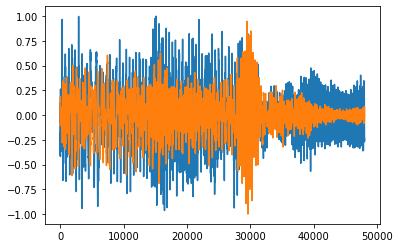

Starting order  2




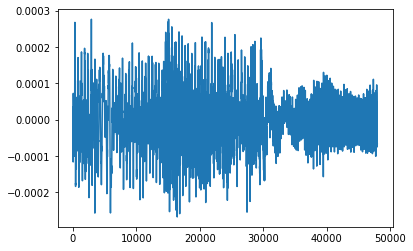

Starting order  4




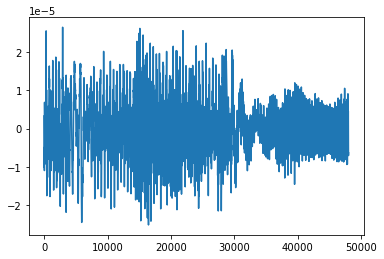

Starting order  8




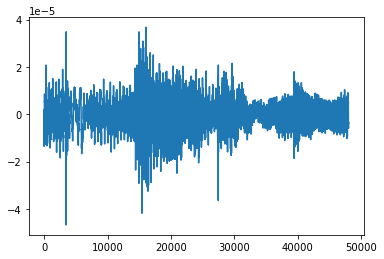

Starting order  16




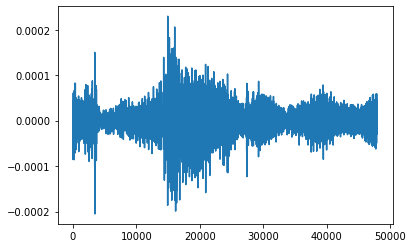

Starting order  32




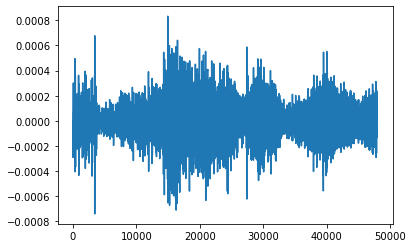

Starting order  64




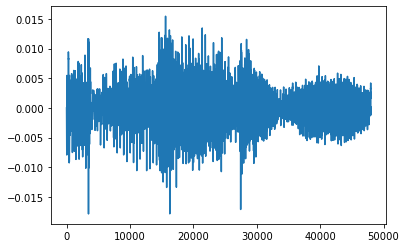

Starting order  128




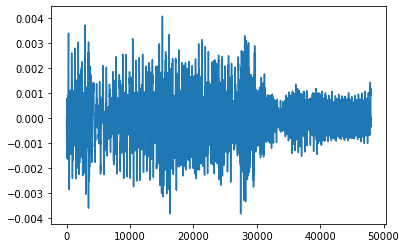

Starting order  256




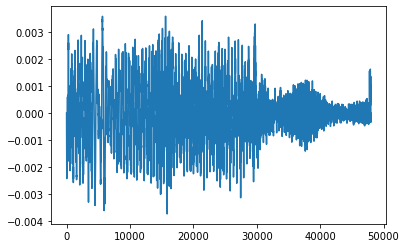

Starting order  512




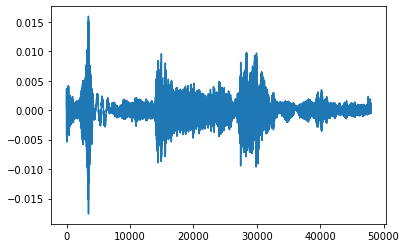

Starting order  1024




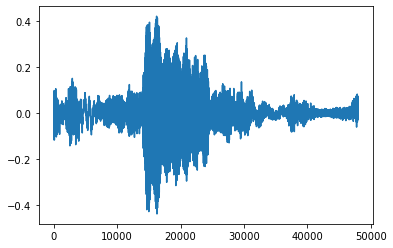

Starting order  2048




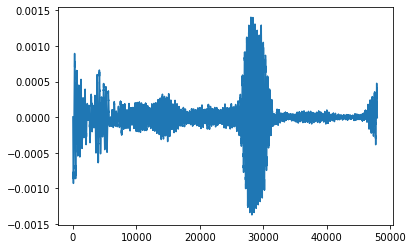

Starting order  4096




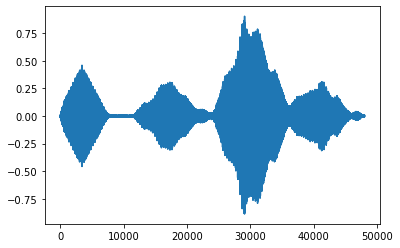

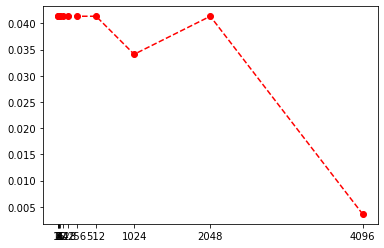

In [21]:
data = song_array/np.amax(abs(song_array))
desired = song_out_array/np.amax(abs(song_out_array))
# data = song_array
# desired = song_out_array
filtered_arr, Jmin_s = search_opt_M(data-np.mean(data), desired-np.mean(desired), [2,4,8,16,32,64,128,256,512,1024,
                                                                                  2048,4096])

In [22]:
IPython.display.Audio(song_array,rate=fs)

In [23]:
IPython.display.Audio(song_out_array,rate=fs)

In [24]:
IPython.display.Audio(filtered_arr[4],rate=fs)